In [1]:
import os
import pandas as pd
from activity_count_function import *
from group_analysis_ac_functions import *
from individual_analysis_ac_functions import *
from utilities import *
from individual_analysis_fs_functions import *
from group_analysis_fs_functions import *
from gm_function import *

C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Pierre-Louis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# PATH # 

initial_path = '../CreateStudy'
participant_group = 'H'
# Constant # 
threshold_labels = ['CT', 'OT']
side_labels = ['ndh', 'DH', 'bilateral']
metric_labels = ['Sensitivity', 'Specificity', 'Accuracy']
metric_names_to_plot = ['Sensitivity', 'Specificity', 'Accuracy', 'Youden Index']

# Files to fetch for each participants 
csv_file_names = ['optimal_threshold_AC.csv', 'optimal_threshold_GM.csv',
                  'evaluation_metrics_AC.csv', 'evaluation_metrics_GM.csv', 'evaluation_metrics_GMAC.csv']

conventional_functional_space = 30
conventional_threshold_unilateral = 2 # Bailey and Lang, 2013
conventional_threshold_bilateral = 0 # Bailey and Lang, 2013

In [3]:
# Load testing dataset, ie participant removed from all the analysis 
testing_participant_id = 'H005'
testing_participant_path = os.path.join(initial_path, testing_participant_id)
testing_data = load_testing_data(testing_participant_path)

(testing_count_brond_ndh, testing_count_brond_dh,
 testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
 testing_pitch_mad_ndh, testing_yaw_mad_ndh, testing_pitch_mad_dh, testing_yaw_mad_dh,
 testing_GT_mask_50Hz_ndh, testing_GT_mask_50Hz_dh, testing_GT_mask_bil_50Hz) = testing_data

In [4]:
# Analysis across individuals #

In [12]:
# Get the  csv file paths for each participant minus the testing participant removed from the analysis 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_names, participant_group)

In [13]:
csv_files_dict

{'optimal_threshold_AC.csv': ['../CreateStudy\\H001\\optimal_threshold_AC.csv',
  '../CreateStudy\\H002\\optimal_threshold_AC.csv',
  '../CreateStudy\\H003\\optimal_threshold_AC.csv',
  '../CreateStudy\\H004\\optimal_threshold_AC.csv',
  '../CreateStudy\\H005\\optimal_threshold_AC.csv',
  '../CreateStudy\\H006\\optimal_threshold_AC.csv',
  '../CreateStudy\\H007\\optimal_threshold_AC.csv'],
 'optimal_threshold_GM.csv': ['../CreateStudy\\H001\\optimal_threshold_GM.csv',
  '../CreateStudy\\H002\\optimal_threshold_GM.csv',
  '../CreateStudy\\H003\\optimal_threshold_GM.csv',
  '../CreateStudy\\H004\\optimal_threshold_GM.csv',
  '../CreateStudy\\H005\\optimal_threshold_GM.csv',
  '../CreateStudy\\H006\\optimal_threshold_GM.csv',
  '../CreateStudy\\H007\\optimal_threshold_GM.csv'],
 'evaluation_metrics_AC.csv': ['../CreateStudy\\H001\\evaluation_metrics_AC.csv',
  '../CreateStudy\\H002\\evaluation_metrics_AC.csv',
  '../CreateStudy\\H003\\evaluation_metrics_AC.csv',
  '../CreateStudy\\H004\\e

In [14]:
optimal_threshold_AC_path =  csv_files_dict['optimal_threshold_AC.csv']
optimal_threshold_GM_path = csv_files_dict['optimal_threshold_GM.csv']
evaluation_metrics_AC_path = csv_files_dict['evaluation_metrics_AC.csv']
evaluation_metrics_GM_path = csv_files_dict['evaluation_metrics_GM.csv']
evaluation_metrics_GMAC_path = csv_files_dict['evaluation_metrics_GMAC.csv']

# Get the optimal thresholds from the csv file paths 
group_optimal_threshold_AC = extract_data_from_csv(optimal_threshold_AC_path)
group_optimal_threshold_GM = extract_data_from_csv(optimal_threshold_GM_path)

# Split ndh and dh 
group_optimal_threshold_AC_ndh, group_optimal_threshold_AC_dh = group_optimal_threshold_AC
group_optimal_threshold_GM_ndh, group_optimal_threshold_GM_dh = group_optimal_threshold_GM

# Get the evaluation metrics for each participant 
group_evaluation_metrics_AC = regroup_field_data_metrics(evaluation_metrics_AC_path)
group_evaluation_metrics_GM = regroup_field_data_metrics(evaluation_metrics_GM_path)
group_evaluation_metrics_GMAC = regroup_field_data_metrics(evaluation_metrics_GMAC_path)

In [15]:
## AC ## 

In [16]:
def plot_side_by_side_boxplots(optimal_threshold_ndh, optimal_threshold_dh, threshold, plot_title):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Colors for 'ndh' and 'dh' sides
    ndh_color = 'skyblue'
    dh_color = 'lightgreen'

    # Box plot for ndh side
    ndh_box = plt.boxplot(optimal_threshold_ndh, positions=[1], labels=['ndh'], patch_artist=True, boxprops=dict(facecolor=ndh_color))
    # Box plot for dh side
    dh_box = plt.boxplot(optimal_threshold_dh, positions=[2], labels=['dh'], patch_artist=True, boxprops=dict(facecolor=dh_color))

    # Add the threshold line
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Conventional threshold = {threshold}')

    plt.title(plot_title)
    plt.xlabel('Side')
    plt.ylabel('Optimal Threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Calculate and print the average values
    avg_ndh = np.mean(optimal_threshold_ndh)
    avg_dh = np.mean(optimal_threshold_dh)
    print(f'Average ndh: {avg_ndh:.2f}')
    print(f'Average dh: {avg_dh:.2f}')

    # Calculate and print the median values
    median_ndh = np.median(optimal_threshold_ndh)
    median_dh = np.median(optimal_threshold_dh)
    print(f'Median ndh: {median_ndh:.2f}')
    print(f'Median dh: {median_dh:.2f}')


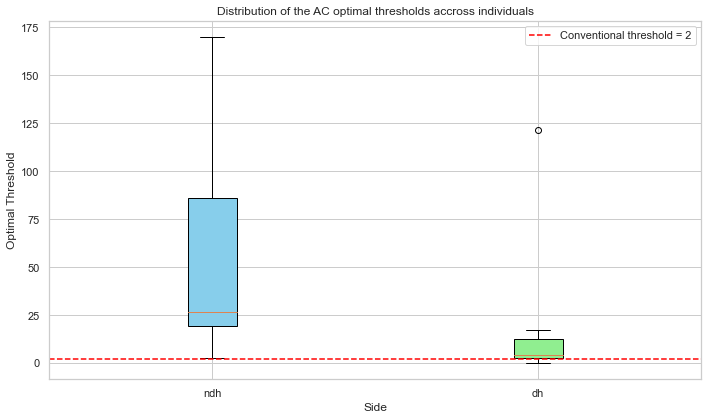

Average ndh: 58.39
Average dh: 22.34
Median ndh: 26.38
Median dh: 4.41


In [17]:
plot_side_by_side_boxplots(group_optimal_threshold_AC_ndh, group_optimal_threshold_AC_dh, conventional_threshold_unilateral, 'Distribution of the AC optimal thresholds accross individuals')

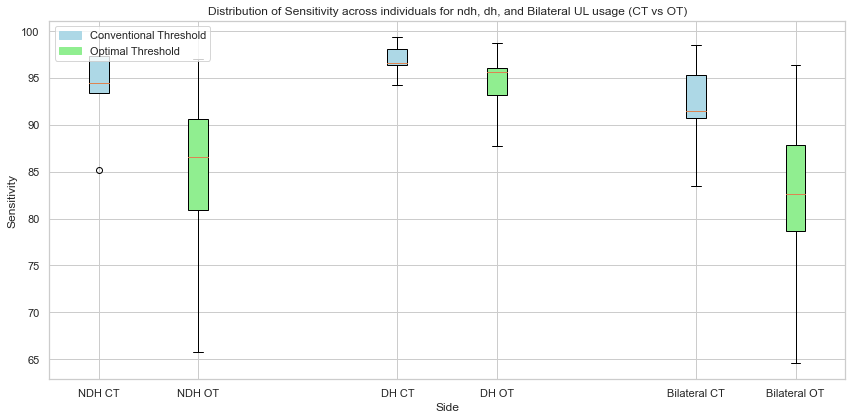

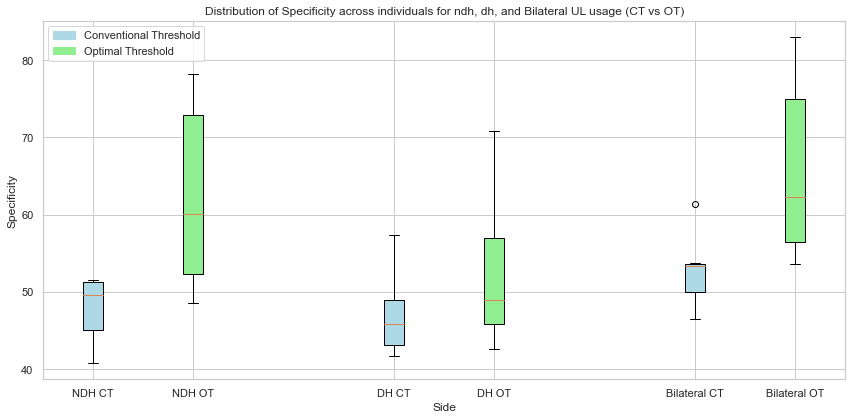

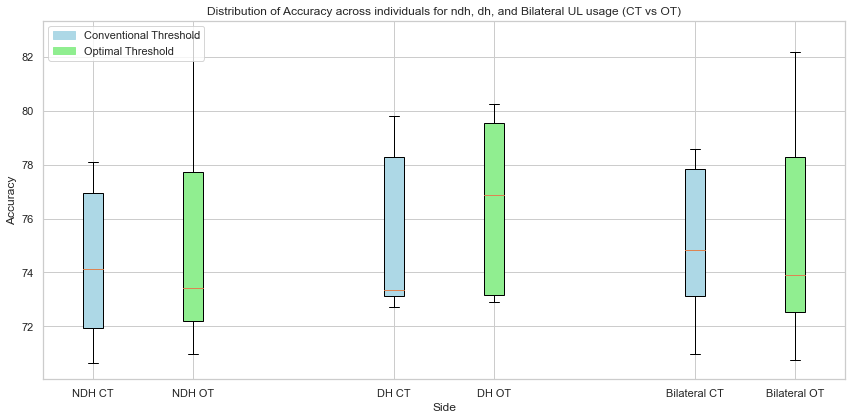

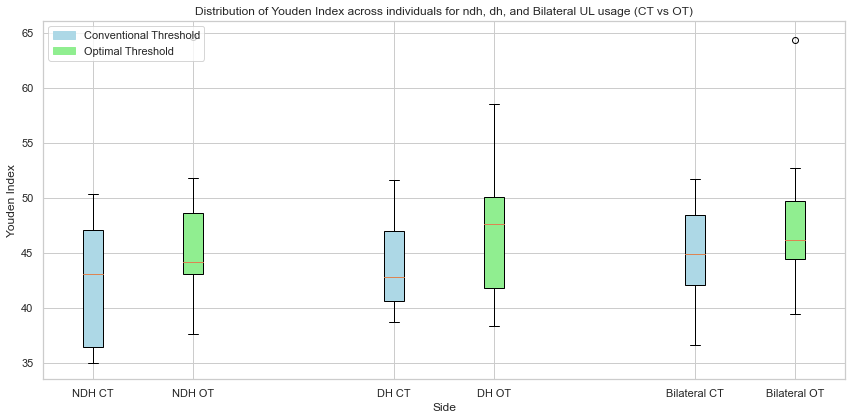

In [18]:
plot_side_metrics(group_evaluation_metrics_AC, metric_names_to_plot)
# Sensitivity measures the ability of a model to correctly identify positive instances
# (e.g., the presence of a certain condition or event).
# Specificity measures the ability of a model to correctly identify negative instances
#(e.g., the absence of a certain condition or event).
# Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives.
# Youden Index is often used when the model's performance needs to balance sensitivity and specificity,
#and there is a need to optimize the trade-off between true positive rate and false positive rate.

In [19]:
## GM ## 

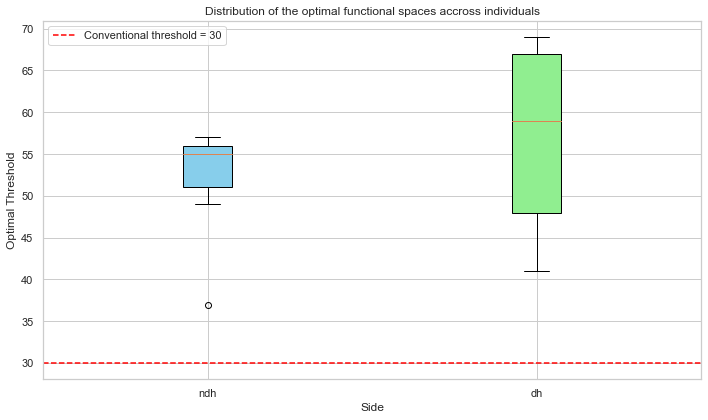

Average ndh: 51.86
Average dh: 57.00
Median ndh: 55.00
Median dh: 59.00


In [20]:
plot_side_by_side_boxplots(group_optimal_threshold_GM_ndh, group_optimal_threshold_GM_dh, conventional_functional_space, 'Distribution of the optimal functional spaces accross individuals')

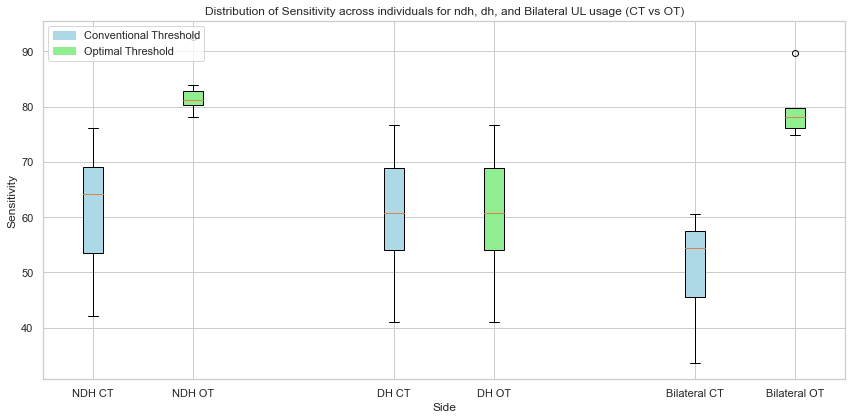

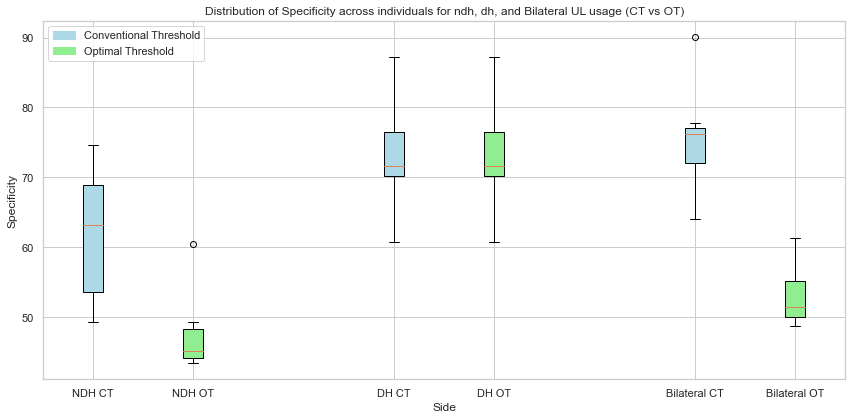

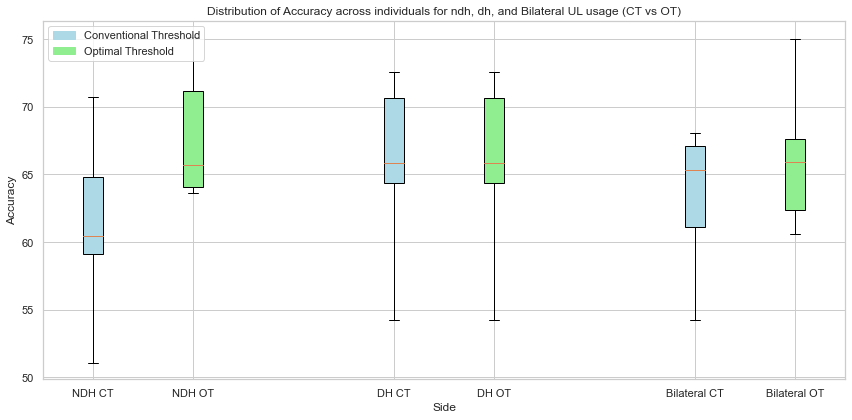

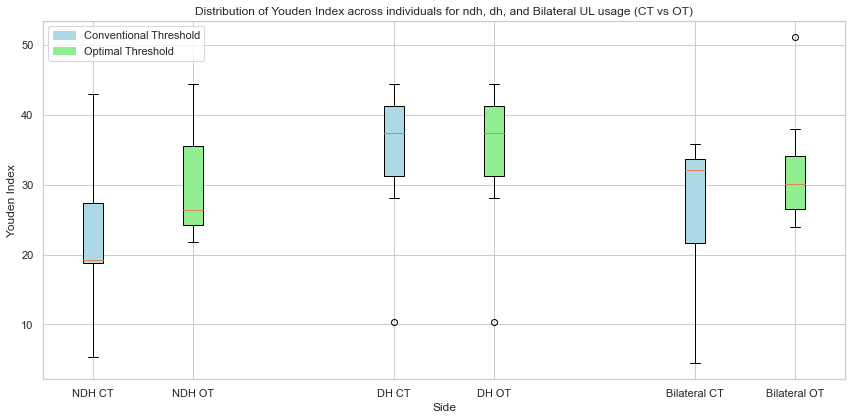

In [21]:
plot_side_metrics(group_evaluation_metrics_GM, metric_names_to_plot)
# Sensitivity measures the ability of a model to correctly identify positive instances
# (e.g., the presence of a certain condition or event).
# Specificity measures the ability of a model to correctly identify negative instances
#(e.g., the absence of a certain condition or event).
# Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives.
# Youden Index is often used when the model's performance needs to balance sensitivity and specificity,
#and there is a need to optimize the trade-off between true positive rate and false positive rate.

In [22]:
# GMAC # 

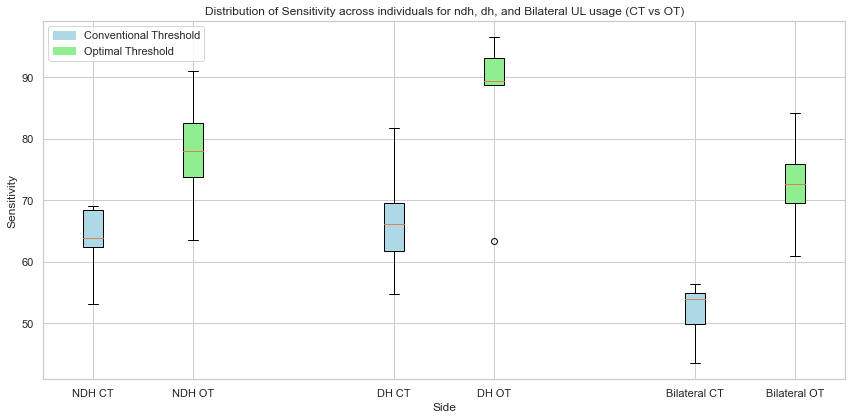

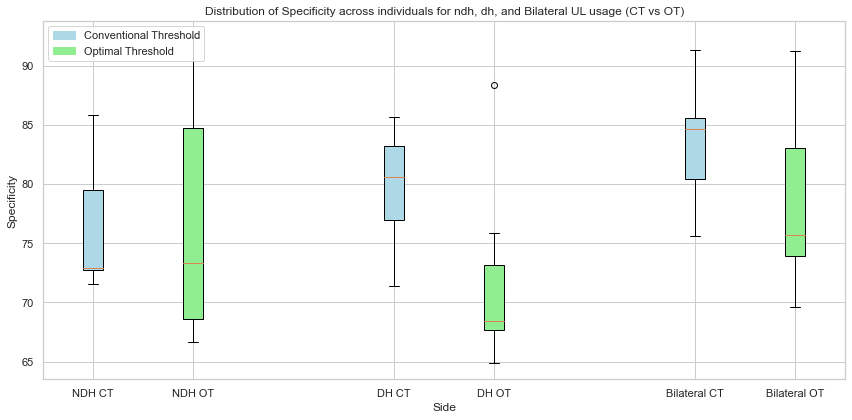

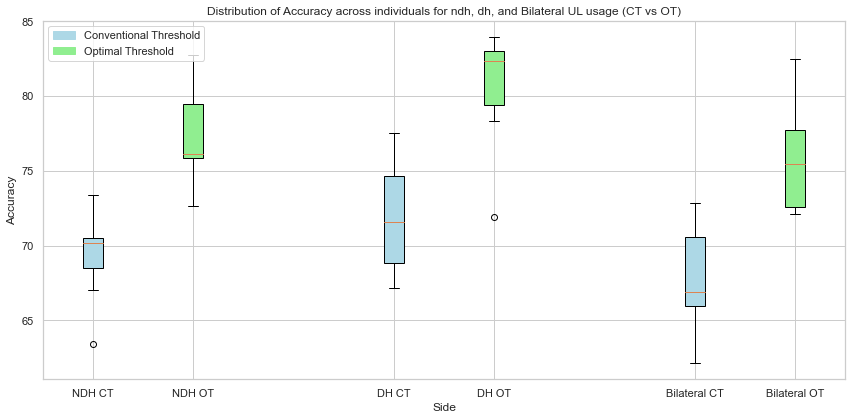

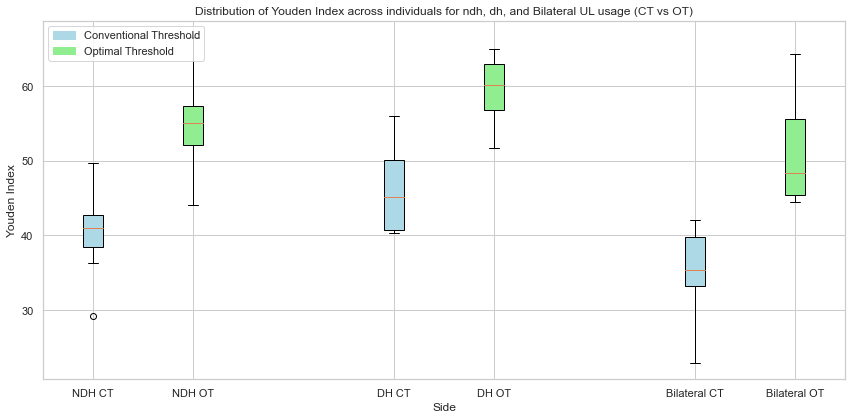

In [23]:
plot_side_metrics(group_evaluation_metrics_GMAC, metric_names_to_plot)
# Sensitivity measures the ability of a model to correctly identify positive instances
# (e.g., the presence of a certain condition or event).
# Specificity measures the ability of a model to correctly identify negative instances
#(e.g., the absence of a certain condition or event).
# Accuracy measures the overall correctness of the model's predictions, considering both true positives and true negatives.
# Youden Index is often used when the model's performance needs to balance sensitivity and specificity,
#and there is a need to optimize the trade-off between true positive rate and false positive rate.

In [24]:
## Group Analysis ##

In [25]:
## AC ##

In [26]:
# Constant # 
group_csv_file_names_ac = ['count_brond_ndh.csv', 'count_brond_dh.csv', 'GT_mask_ndh_1Hz.csv', 'GT_mask_dh_1Hz.csv']

In [27]:
# Get the  csv files for each participant 
group_csv_files_dict_ac = find_specific_csv_files(initial_path, group_csv_file_names_ac, participant_group, testing_participant = testing_participant_id)

count_brond_ndh_paths =  group_csv_files_dict_ac['count_brond_ndh.csv']
count_brond_dh_paths = group_csv_files_dict_ac['count_brond_dh.csv']
GT_mask_ndh_1Hz_paths = group_csv_files_dict_ac['GT_mask_ndh_1Hz.csv']
GT_mask_dh_1Hz_paths = group_csv_files_dict_ac['GT_mask_dh_1Hz.csv']

In [30]:
group_csv_files_dict_ac

{'count_brond_ndh.csv': ['../CreateStudy\\H001\\count_brond_ndh.csv',
  '../CreateStudy\\H002\\count_brond_ndh.csv',
  '../CreateStudy\\H003\\count_brond_ndh.csv',
  '../CreateStudy\\H004\\count_brond_ndh.csv',
  '../CreateStudy\\H006\\count_brond_ndh.csv',
  '../CreateStudy\\H007\\count_brond_ndh.csv'],
 'count_brond_dh.csv': ['../CreateStudy\\H001\\count_brond_dh.csv',
  '../CreateStudy\\H002\\count_brond_dh.csv',
  '../CreateStudy\\H003\\count_brond_dh.csv',
  '../CreateStudy\\H004\\count_brond_dh.csv',
  '../CreateStudy\\H006\\count_brond_dh.csv',
  '../CreateStudy\\H007\\count_brond_dh.csv'],
 'GT_mask_ndh_1Hz.csv': ['../CreateStudy\\H001\\GT_mask_ndh_1Hz.csv',
  '../CreateStudy\\H002\\GT_mask_ndh_1Hz.csv',
  '../CreateStudy\\H003\\GT_mask_ndh_1Hz.csv',
  '../CreateStudy\\H004\\GT_mask_ndh_1Hz.csv',
  '../CreateStudy\\H006\\GT_mask_ndh_1Hz.csv',
  '../CreateStudy\\H007\\GT_mask_ndh_1Hz.csv'],
 'GT_mask_dh_1Hz.csv': ['../CreateStudy\\H001\\GT_mask_dh_1Hz.csv',
  '../CreateStudy\\H0

(966,)
(821,)
(832,)
(856,)
(768,)
(881,)


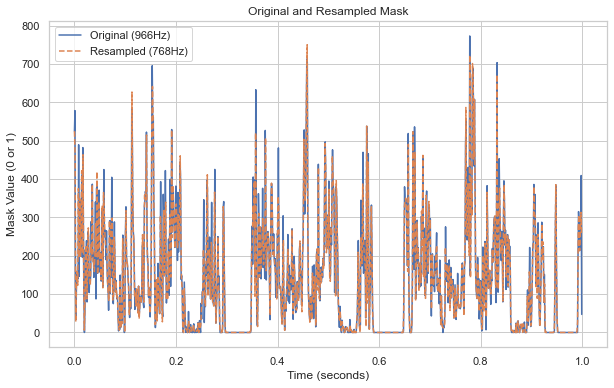

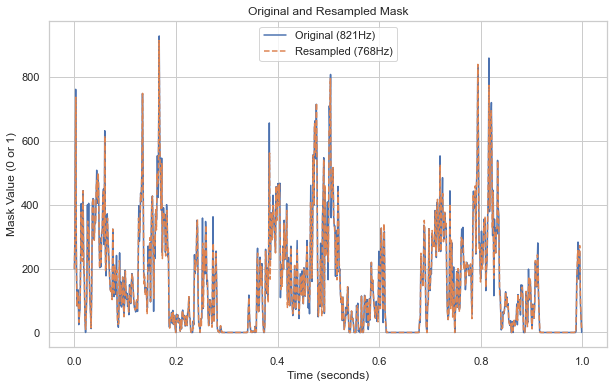

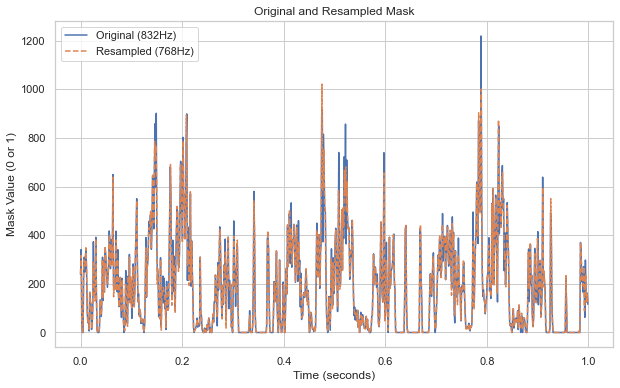

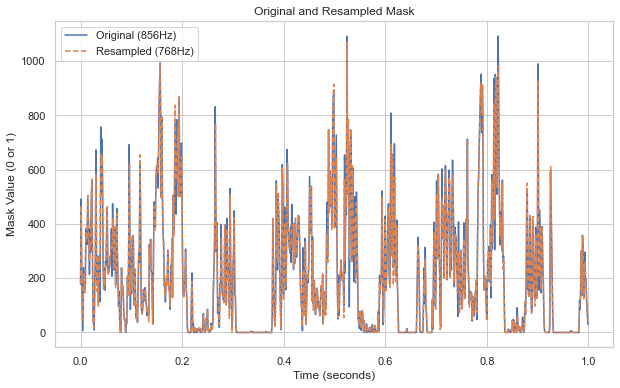

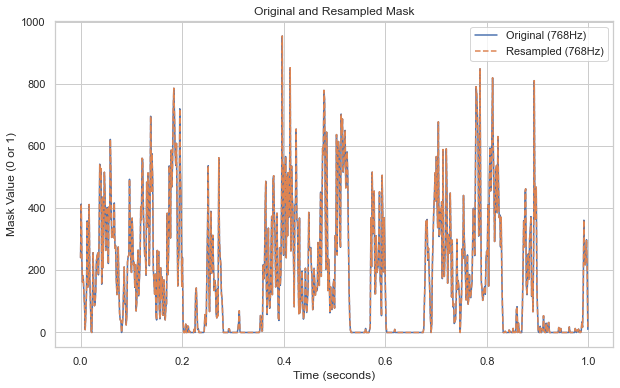

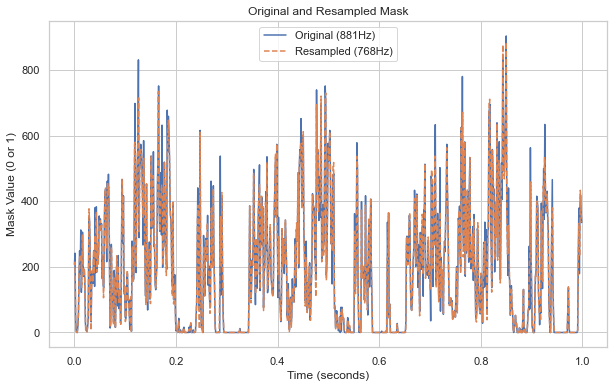

Elements removed in array 1: 198
Elements removed in array 2: 53
Elements removed in array 3: 64
Elements removed in array 4: 88
Elements removed in array 5: 0
Elements removed in array 6: 113
(966,)
(821,)
(832,)
(856,)
(768,)
(881,)


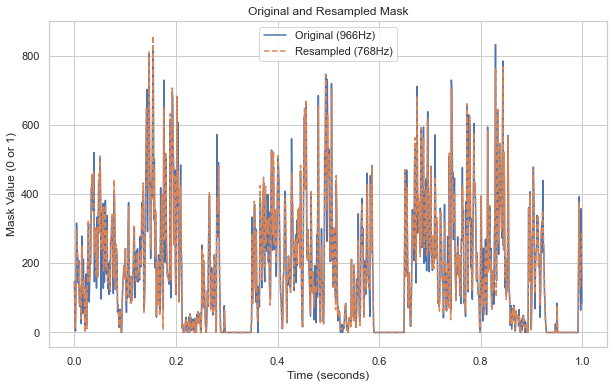

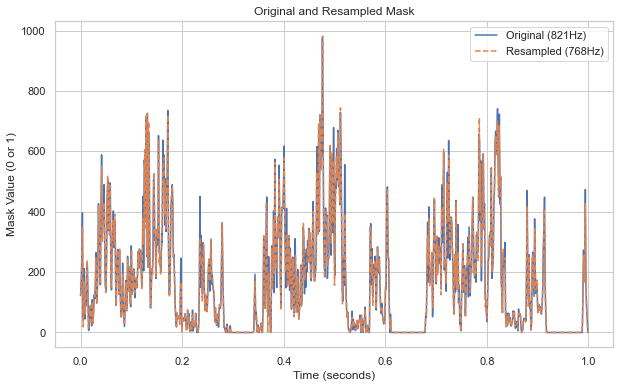

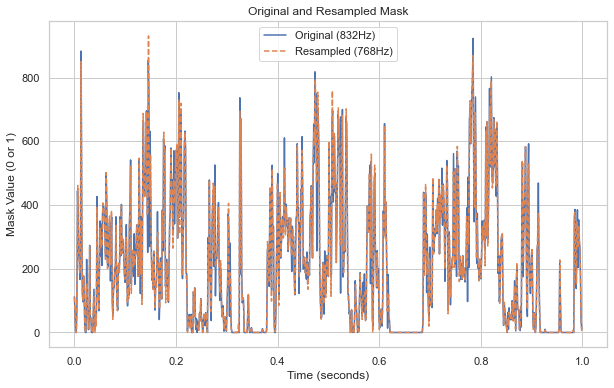

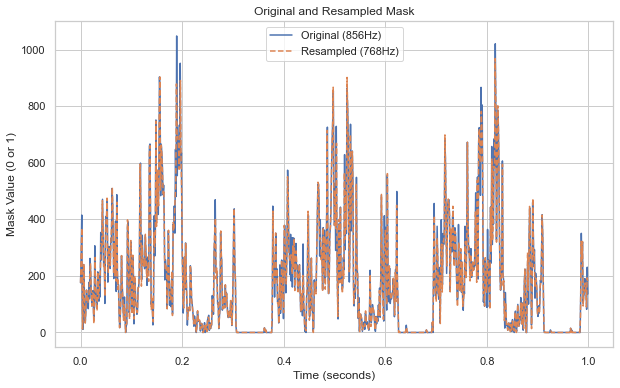

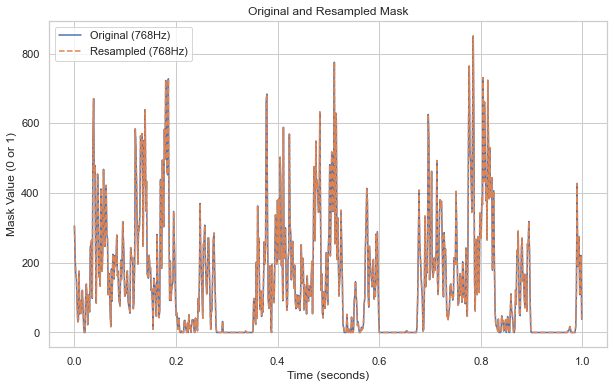

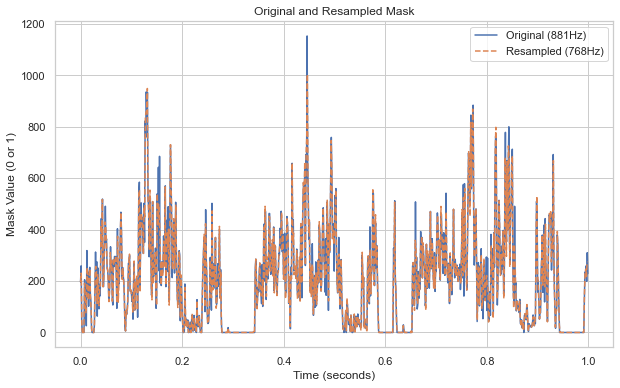

Elements removed in array 1: 198
Elements removed in array 2: 53
Elements removed in array 3: 64
Elements removed in array 4: 88
Elements removed in array 5: 0
Elements removed in array 6: 113
(965,)
(821,)
(831,)
(855,)
(767,)
(880,)


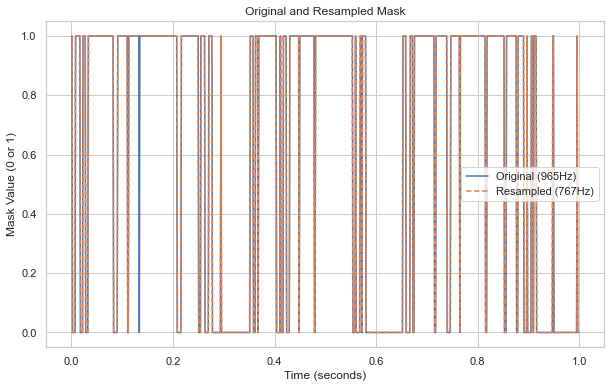

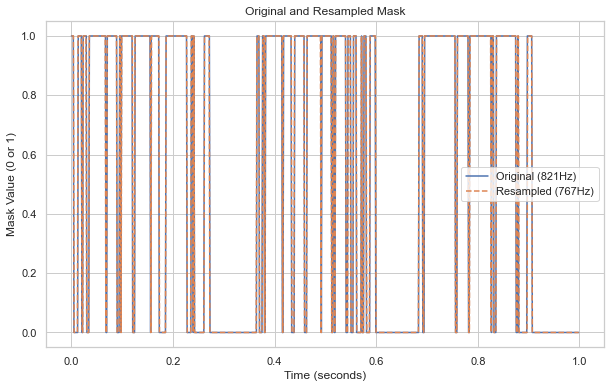

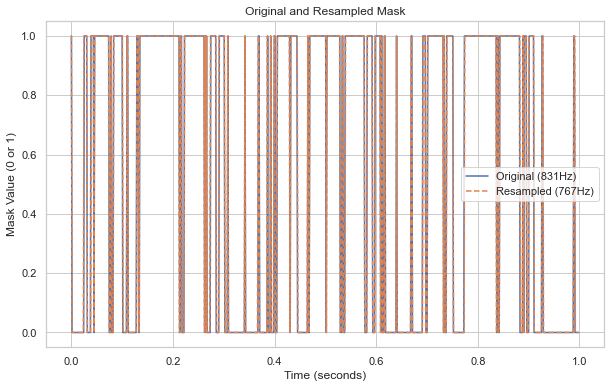

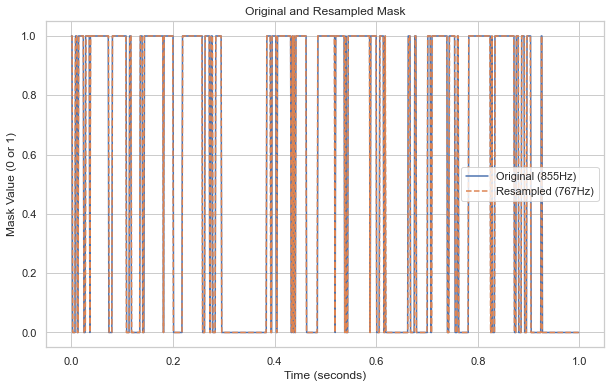

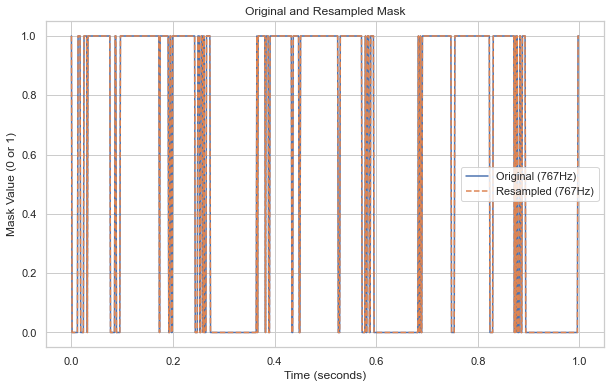

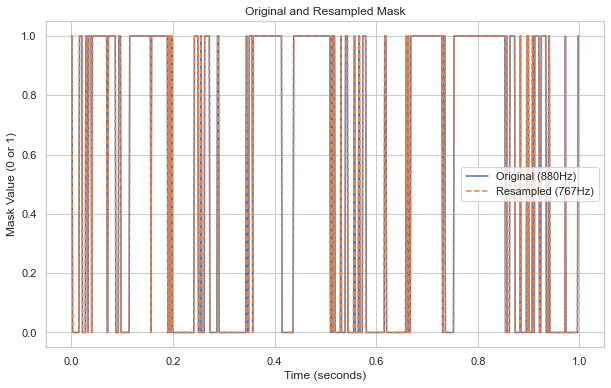

Elements removed in array 1: 198
Elements removed in array 2: 54
Elements removed in array 3: 64
Elements removed in array 4: 88
Elements removed in array 5: 0
Elements removed in array 6: 113
(965,)
(821,)
(831,)
(855,)
(767,)
(880,)


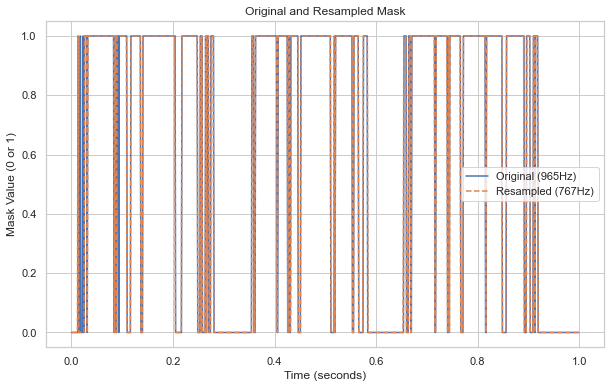

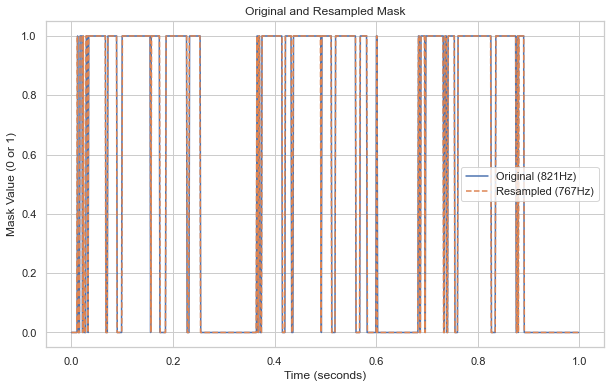

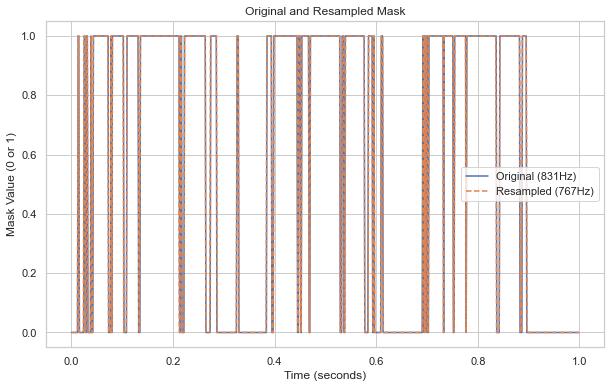

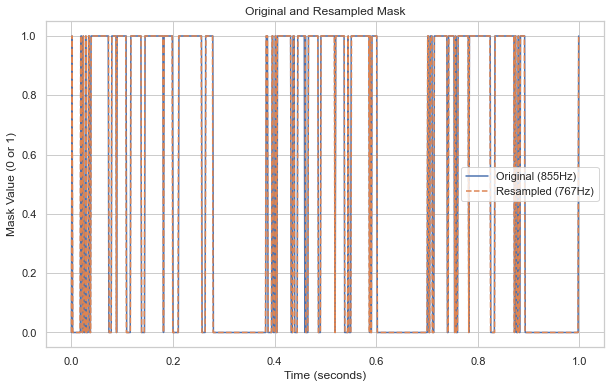

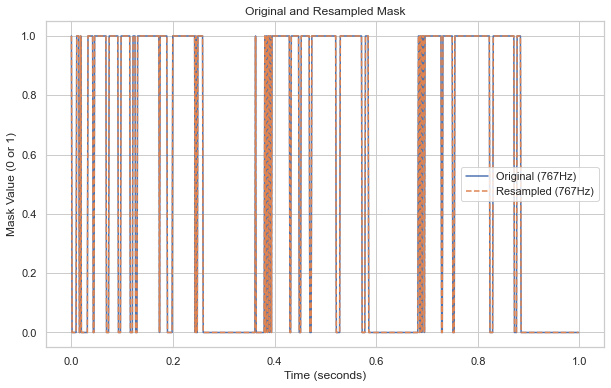

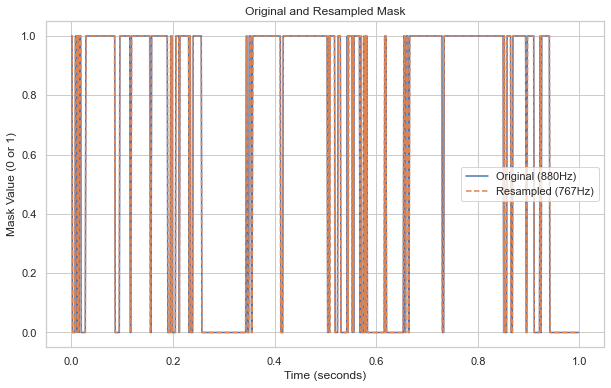

Elements removed in array 1: 198
Elements removed in array 2: 54
Elements removed in array 3: 64
Elements removed in array 4: 88
Elements removed in array 5: 0
Elements removed in array 6: 113


In [32]:
# Compute the group dataset, downsampling to the smallest participant dataset
group_count_brond_ndh = get_group_dataset_from_csv(count_brond_ndh_paths, mask=False)
group_count_brond_dh = get_group_dataset_from_csv(count_brond_dh_paths, mask=False)
group_GT_mask_ndh_1Hz = get_group_dataset_from_csv(GT_mask_ndh_1Hz_paths, mask=True)
group_GT_mask_dh_1Hz = get_group_dataset_from_csv(GT_mask_dh_1Hz_paths, mask=True)

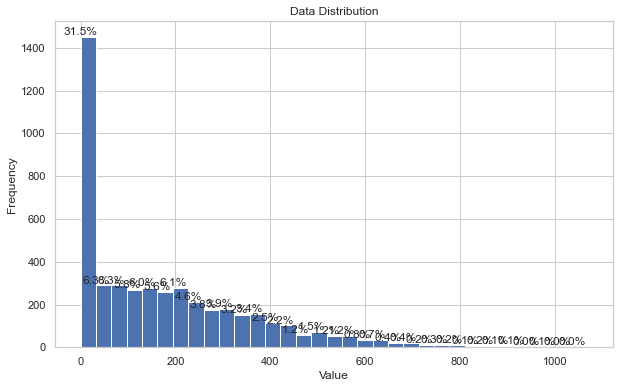

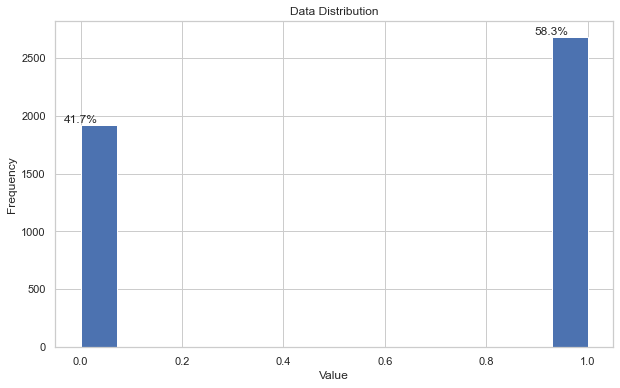

({'mean': 177.38042846858227,
  'median': 130.44052866877956,
  'iqr': 272.21868950926176,
  'range': 1069.5705792194944,
  'std': 185.63612001821292,
  'max': 1069.5705792194944,
  'min': 0.0,
  'num_elements': 4608},
 {'mean': 0.5827900912646675,
  'median': 1.0,
  'iqr': 1.0,
  'range': 1,
  'std': 0.4930981654684876,
  'max': 1,
  'min': 0,
  'num_elements': 4602})

In [33]:
get_statistics(group_count_brond_ndh), get_statistics(group_GT_mask_ndh_1Hz), 

In [34]:
# Perform ROC for the entire group using k fold cross validation

In [35]:
# Splitting the data for the ND wrist
#group_GT_mask_ndh_1Hz, group_count_brond_ndh = remove_extra_elements(group_GT_mask_ndh_1Hz, group_count_brond_ndh)
X_ndh = group_count_brond_ndh
y_ndh = group_GT_mask_ndh_1Hz

In [36]:
# Perform k-fold cross-validation for the ND wrist data
# Optimal: Return average optimal AC threshold and average evaluation metrics 
eval_metrics_opt_ndh, opt_threshold_ndh = k_fold_cross_validation(X_ndh, y_ndh, optimal=True)

# Conventional: Return conventional AC threshold and average evaluation metrics 
eval_metrics_conv_ndh, conv_threshold_ndh = k_fold_cross_validation(X_ndh, y_ndh, optimal=False)

Iteration 1/5
AUC: 0.75
Optimal Threshold: 23.32
Conventional Threshold: 2.00
AUC is not clinically useful (<0.75)
Iteration 2/5
AUC: 0.76
Optimal Threshold: 18.54
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 3/5
AUC: 0.75
Optimal Threshold: 23.23
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 4/5
AUC: 0.74
Optimal Threshold: 18.74
Conventional Threshold: 2.00
AUC is not clinically useful (<0.75)
Iteration 5/5
AUC: 0.75
Optimal Threshold: 23.33
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 1/5
Using conventional threshold
Iteration 2/5
Using conventional threshold
Iteration 3/5
Using conventional threshold
Iteration 4/5
Using conventional threshold
Iteration 5/5
Using conventional threshold


In [37]:
# Splitting the data for the right wrist
#group_GT_mask_dh_1Hz, group_count_brond_dh= remove_extra_elements(group_GT_mask_dh_1Hz, group_count_brond_dh)
X_dh = group_count_brond_dh
y_dh = group_GT_mask_dh_1Hz

# Perform k-fold cross-validation for the right wrist data
# Optimal: Return average optimal AC threshold and average evaluation metrics 
eval_metrics_opt_dh, opt_threshold_dh = k_fold_cross_validation(X_dh, y_dh, optimal=True)

# Conventional: Return conventional AC threshold and average evaluation metrics 
eval_metrics_conv_dh, conv_threshold_dh = k_fold_cross_validation(X_dh, y_dh, optimal=False)

Iteration 1/5
AUC: 0.77
Optimal Threshold: 22.01
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 2/5
AUC: 0.77
Optimal Threshold: 12.70
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 3/5
AUC: 0.77
Optimal Threshold: 12.00
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 4/5
AUC: 0.77
Optimal Threshold: 13.67
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 5/5
AUC: 0.77
Optimal Threshold: 13.67
Conventional Threshold: 2.00
AUC is clinically useful (≥0.75)
Iteration 1/5
Using conventional threshold
Iteration 2/5
Using conventional threshold
Iteration 3/5
Using conventional threshold
Iteration 4/5
Using conventional threshold
Iteration 5/5
Using conventional threshold


In [38]:
eval_metrics_opt_bil = k_fold_cross_validation_bilateral(X_ndh, X_dh, y_ndh, y_dh, opt_threshold_ndh,
                                                         opt_threshold_dh, optimal=True)
eval_metrics_conv_bil = k_fold_cross_validation_bilateral(X_ndh, X_dh, y_ndh, y_dh, opt_threshold_ndh,
                                                          opt_threshold_dh, optimal=False)

Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5
Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5


In [39]:
# Get the group optimal AC thresholds 
print(opt_threshold_ndh, opt_threshold_dh)
save_optimal_threshold(initial_path, opt_threshold_ndh, opt_threshold_dh, AC = True)

21.43 14.81
Thresholds saved successfully at: ../CreateStudy\optimal_threshold_AC.csv


In [40]:
# Evaluation done on seen data not on a new participant 
# plot_radar_chart(eval_metrics_conv_ndh, eval_metrics_opt_ndh, metric = 'AC')
# plot_radar_chart(eval_metrics_conv_dh, eval_metrics_opt_dh, metric = 'AC')
# plot_radar_chart(eval_metrics_conv_bil, eval_metrics_opt_bil, metric = 'AC')

In [41]:
# # Create a structure to save all the metrics 
# metrics_dictionary = create_metrics_dictionary(eval_metrics_conv_ndh, eval_metrics_conv_dh, eval_metrics_conv_bil, eval_metrics_opt_ndh, eval_metrics_opt_dh, eval_metrics_opt_bil)
# metrics_dictionary

In [42]:
# # Save metrics as csv file: evaluation metrics on unseen data 
# save_metrics_dictionary_as_csv(metrics_dictionary, initial_path)
# # Save optimal AC threhshold for this participant 
# save_optimal_threshold(initial_path, opt_threshold_ndh, opt_threshold_dh)

In [43]:
## GM ## 

In [44]:
# PATH # 
csv_file_name_gm = ['gm_datasets.csv']

# Get the  csv file paths for each participant minus the testing participant 
csv_files_dict = find_specific_csv_files(initial_path, csv_file_name_gm, testing_participant_id)

In [45]:
# Extract group datasets 

In [46]:
pitch_mad_ndh, yaw_mad_ndh, pitch_mad_dh, yaw_mad_dh, GT_mask_50Hz_ndh, GT_mask_50Hz_dh = get_group_data_gm(csv_files_dict)

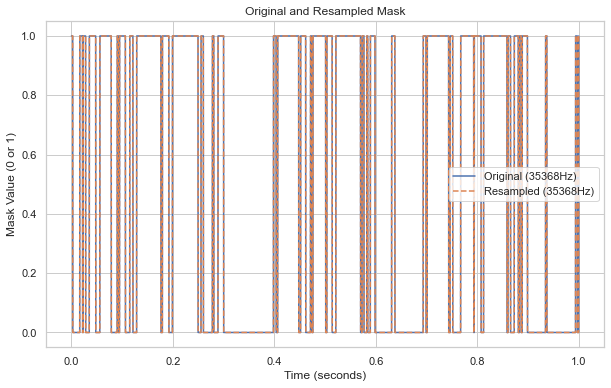

Elements removed in array 1: 0


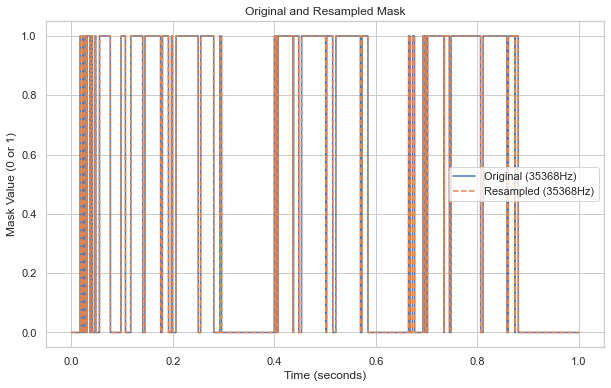

Elements removed in array 1: 0


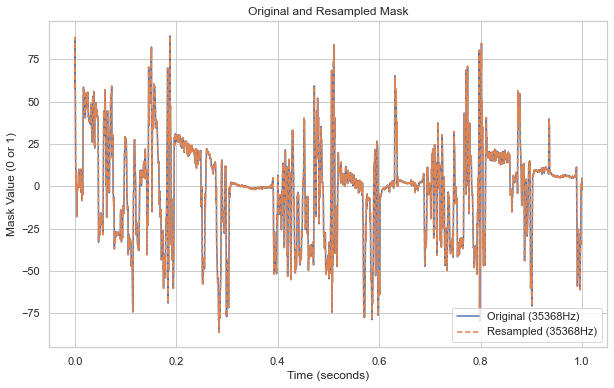

Elements removed in array 1: 0


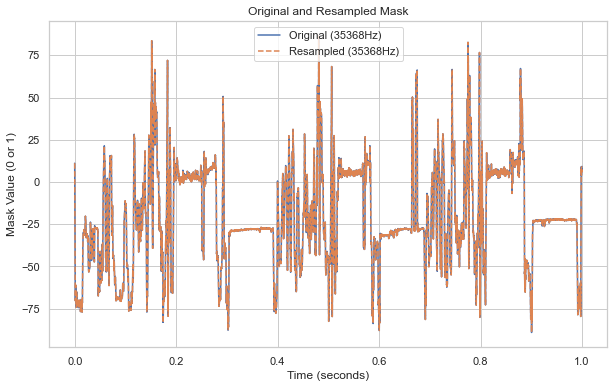

Elements removed in array 1: 0


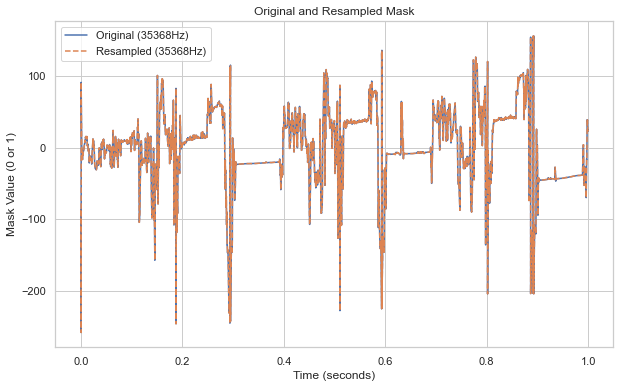

Elements removed in array 1: 0


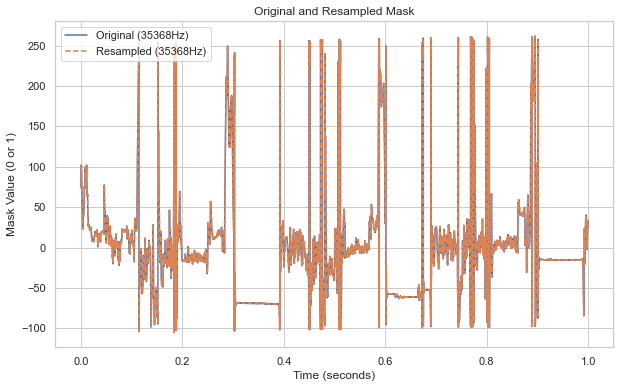

Elements removed in array 1: 0


In [47]:
group_GT_mask_50Hz_ndh = merge_group_data_gm(GT_mask_50Hz_ndh)
group_GT_mask_50Hz_dh = merge_group_data_gm(GT_mask_50Hz_dh)
group_pitch_mad_ndh = merge_group_data_gm(pitch_mad_ndh, mask = False)
group_pitch_mad_dh = merge_group_data_gm(pitch_mad_dh, mask = False)
group_yaw_mad_ndh = merge_group_data_gm(yaw_mad_ndh, mask = False)
group_yaw_mad_dh = merge_group_data_gm(yaw_mad_dh, mask = False)

In [48]:
# Optimal FS Left wrist 
group_eval_metrics_fs_opt_ndh, group_optimal_fs_ndh = optimal_fs_computation(group_pitch_mad_ndh, group_yaw_mad_ndh, group_GT_mask_50Hz_ndh,
                                                               k=5, random_state=42, optimal=True)

# Conventional Left wrist 
group_eval_metrics_fs_conv_ndh, _ = optimal_fs_computation(group_pitch_mad_ndh, group_yaw_mad_ndh, group_GT_mask_50Hz_ndh,
                                                    k=5, random_state=42, optimal=False)

In [49]:
# Optimal FS Right wrist 
group_eval_metrics_fs_opt_dh, group_optimal_fs_dh = optimal_fs_computation(group_pitch_mad_dh, group_yaw_mad_dh, group_GT_mask_50Hz_dh,
                                                               k=5, random_state=42, optimal=True)

# Conventional Right wrist 
group_eval_metrics_fs_conv_dh, _ = optimal_fs_computation(group_pitch_mad_dh, group_yaw_mad_dh, group_GT_mask_50Hz_dh,
                                                    k=5, random_state=42, optimal=False)

In [50]:
# Optimal FS Bilateral 
group_eval_metrics_fs_opt_bil = optimal_fs_computation_bilateral(group_pitch_mad_ndh, group_yaw_mad_ndh, group_GT_mask_50Hz_ndh,
                                     group_pitch_mad_dh, group_yaw_mad_dh, group_GT_mask_50Hz_dh,
                                     group_optimal_fs_ndh, group_optimal_fs_dh,k=5, random_state=42, optimal=True)

# Conventional Bilateral 
group_eval_metrics_fs_conv_bil = optimal_fs_computation_bilateral(group_pitch_mad_ndh, group_yaw_mad_ndh, group_GT_mask_50Hz_ndh,
                                     group_pitch_mad_dh, group_yaw_mad_dh, group_GT_mask_50Hz_dh,
                                     group_optimal_fs_ndh, group_optimal_fs_dh,k=5, random_state=42, optimal=False)

In [51]:
# Get the group optimal AC thresholds 
print(group_optimal_fs_ndh, group_optimal_fs_dh)
save_optimal_threshold(initial_path, group_optimal_fs_ndh, group_optimal_fs_dh, AC = False)

55.0 49.0
Thresholds saved successfully at: ../CreateStudy\optimal_threshold_GM.csv


In [52]:
# Eval not done on a new participant 
# plot_radar_chart(group_eval_metrics_fs_conv_ndh, group_eval_metrics_fs_opt_ndh, metric = 'GM')
# plot_radar_chart(group_eval_metrics_fs_conv_dh, group_eval_metrics_fs_opt_dh, metric = 'GM')
# plot_radar_chart(group_eval_metrics_fs_conv_bil, group_eval_metrics_fs_opt_bil, metric = 'GM')

In [53]:
# # Create a structure to save all the metrics 
# metrics_dictionary = create_metrics_dictionary(group_eval_metrics_fs_conv_ndh, group_eval_metrics_fs_conv_dh, group_eval_metrics_fs_conv_bil, group_eval_metrics_fs_opt_ndh, group_eval_metrics_fs_opt_dh, group_eval_metrics_fs_opt_bil)
# metrics_dictionary

In [54]:
# # Save metrics as csv file: evaluation metrics on unseen data 
# save_metrics_dictionary_as_csv(metrics_dictionary, initial_path, AC=False)
# # Save optimal AC threhshold for this participant 
# save_optimal_threshold(initial_path, group_optimal_fs_ndh, group_optimal_fs_dh , AC = False)

In [55]:
# Using only testing dataset ie unseen for the training of the optimal AC threshold and the optimal FS 

In [56]:
# AC # 

In [46]:
(testing_count_brond_ndh, testing_count_brond_dh,
 testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
 testing_pitch_mad_ndh, testing_yaw_mad_ndh, testing_pitch_mad_dh, testing_yaw_mad_dh,
 testing_GT_mask_50Hz_ndh, testing_GT_mask_50Hz_dh, testing_GT_mask_bil_50Hz)

(array([110.33585093, 272.86626761, 127.47548784,  20.4450483 ,
          0.        ,  27.01851217,  20.51828453,  15.8113883 ,
         29.22327839,  46.87216658,  69.64194139, 176.9321904 ,
        120.30793823,  65.56675987,  35.0142828 ,  69.67065379,
         49.49747468, 149.83324064, 180.34134301, 159.15401346,
         62.12889827,   0.        ,  20.        ,  16.        ,
         55.30822724, 250.41765114, 131.80667661, 320.6633749 ,
        406.13421427, 139.06832853,  79.25906888,  65.46754921,
         53.46026562, 228.04824051,  67.47592163,  26.47640459,
         74.43117626,  14.56021978,   0.        ,  78.3070878 ,
        172.24691579, 191.85932346,  95.90620418, 179.86105749,
        231.27905223, 258.80301389, 186.86358661, 195.98724448,
        242.63965051, 186.76991192, 116.77756634, 260.5494195 ,
        331.37893717, 347.69383083, 144.04513182,  98.84836873,
         70.46985171,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

In [47]:
def compute_evaluation_metrics_ac(testing_count_brond_ndh, testing_count_brond_dh,
                                testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                conventional_threshold_unilateral, opt_threshold_ndh, opt_threshold_dh):
    """
    Compute evaluation metrics for different prediction scenarios.

    Args:
        testing_count_brond_ndh (numpy.ndarray): NumPy array containing AC values for the left bronchus (NDH).
        testing_count_brond_dh (numpy.ndarray): NumPy array containing AC values for the right bronchus (DH).
        testing_GT_mask_ndh_1Hz (pandas.Series): Series containing GT mask values for the left bronchus (NDH).
        testing_GT_mask_dh_1Hz (pandas.Series): Series containing GT mask values for the right bronchus (DH).
        testing_GT_mask_bil_1Hz (pandas.Series): Series containing bilateral GT mask values.
        conventional_threshold_unilateral (float): Conventional AC threshold for unilateral prediction.
        opt_threshold_ndh (float): Optimal AC threshold for NDH prediction.
        opt_threshold_dh (float): Optimal AC threshold for DH prediction.

    Returns:
        Dictionary containing evaluation metrics for different scenarios.
    """
    # Compute predictions
    testing_ac_ndh_conv = get_prediction_ac(testing_count_brond_ndh, conventional_threshold_unilateral)
    testing_ac_ndh_opt = get_prediction_ac(testing_count_brond_ndh, opt_threshold_ndh)

    testing_ac_dh_conv = get_prediction_ac(testing_count_brond_dh, conventional_threshold_unilateral)
    testing_ac_dh_opt = get_prediction_ac(testing_count_brond_dh, opt_threshold_dh)

    testing_ac_bil_conv = get_prediction_bilateral(testing_count_brond_ndh, conventional_threshold_unilateral,
                                                   testing_count_brond_dh, conventional_threshold_unilateral)
    testing_ac_bil_opt = get_prediction_bilateral(testing_count_brond_ndh, opt_threshold_ndh,
                                                  testing_count_brond_dh, opt_threshold_dh)

    # Compute evaluation metrics
    eval_metrics_ndh_conv = get_evaluation_metrics(testing_GT_mask_ndh_1Hz, testing_ac_ndh_conv)
    eval_metrics_ndh_opt = get_evaluation_metrics(testing_GT_mask_ndh_1Hz, testing_ac_ndh_opt)

    eval_metrics_dh_conv = get_evaluation_metrics(testing_GT_mask_dh_1Hz, testing_ac_dh_conv)
    eval_metrics_dh_opt = get_evaluation_metrics(testing_GT_mask_dh_1Hz, testing_ac_dh_opt)

    eval_metrics_bil_conv = get_evaluation_metrics(testing_GT_mask_bil_1Hz, testing_ac_bil_conv)
    eval_metrics_bil_opt = get_evaluation_metrics(testing_GT_mask_bil_1Hz, testing_ac_bil_opt)

    return {
        'ndh_conv': eval_metrics_ndh_conv,
        'ndh_opt': eval_metrics_ndh_opt,
        'dh_conv': eval_metrics_dh_conv,
        'dh_opt': eval_metrics_dh_opt,
        'bil_conv': eval_metrics_bil_conv,
        'bil_opt': eval_metrics_bil_opt
    }

def compute_evaluation_metrics_gm(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                  testing_yaw_mad_ndh, testing_yaw_mad_dh,
                                  testing_GT_mask_50Hz_ndh, testing_GT_mask_50Hz_dh, testing_GT_mask_bil_50Hz,
                                  conventional_functional_space, group_optimal_fs_ndh, group_optimal_fs_dh):
    """
    Compute evaluation metrics for different prediction scenarios using the GM algorithm.

    Args:
        testing_pitch_mad_ndh (numpy.ndarray): NumPy array containing pitch_mad values for the left bronchus (NDH).
        testing_pitch_mad_dh (numpy.ndarray): NumPy array containing pitch_mad values for the right bronchus (DH).
        testing_yaw_mad_ndh (numpy.ndarray): NumPy array containing yaw_mad values for the left bronchus (NDH).
        testing_yaw_mad_dh (numpy.ndarray): NumPy array containing yaw_mad values for the right bronchus (DH).
        testing_GT_mask_50Hz_ndh (numpy.ndarray): NumPy array containing GT_mask_50Hz values for the left bronchus (NDH).
        testing_GT_mask_50Hz_dh (numpy.ndarray): NumPy array containing GT_mask_50Hz values for the right bronchus (DH).
        testing_GT_mask_bil_50Hz (numpy.ndarray): NumPy array containing bilateral GT_mask_50Hz values.
        conventional_functional_space (function): Conventional functional space function for GM.
        group_optimal_fs_ndh (function): Group optimal functional space function for NDH prediction.
        group_optimal_fs_dh (function): Group optimal functional space function for DH prediction.

    Returns:
        Dictionary containing evaluation metrics for different scenarios using the GM algorithm.
    """
    # Compute predictions using GM algorithm
    testing_gm_ndh_conv = gm_algorithm(testing_pitch_mad_ndh, testing_yaw_mad_ndh, conventional_functional_space)
    testing_gm_ndh_opt = gm_algorithm(testing_pitch_mad_ndh, testing_yaw_mad_ndh, group_optimal_fs_ndh)

    testing_gm_dh_conv = gm_algorithm(testing_pitch_mad_dh, testing_yaw_mad_dh, conventional_functional_space)
    testing_gm_dh_opt = gm_algorithm(testing_pitch_mad_dh, testing_yaw_mad_dh, group_optimal_fs_dh)

    # Compute bilateral predictions using GM algorithm
    testing_gm_bil_conv = get_mask_bilateral(testing_gm_ndh_conv, testing_gm_dh_conv)
    testing_gm_bil_opt = get_mask_bilateral(testing_gm_ndh_opt, testing_gm_dh_opt)
    
    # Compute evaluation metrics
    eval_metrics_ndh_conv = get_evaluation_metrics(testing_GT_mask_50Hz_ndh, testing_gm_ndh_conv)
    eval_metrics_ndh_opt = get_evaluation_metrics(testing_GT_mask_50Hz_ndh, testing_gm_ndh_opt)

    eval_metrics_dh_conv = get_evaluation_metrics(testing_GT_mask_50Hz_dh, testing_gm_dh_conv)
    eval_metrics_dh_opt = get_evaluation_metrics(testing_GT_mask_50Hz_dh, testing_gm_dh_opt)

    eval_metrics_bil_conv = get_evaluation_metrics(testing_GT_mask_bil_50Hz, testing_gm_bil_conv)
    eval_metrics_bil_opt = get_evaluation_metrics(testing_GT_mask_bil_50Hz, testing_gm_bil_opt)

    return {
        'ndh_conv': eval_metrics_ndh_conv,
        'ndh_opt': eval_metrics_ndh_opt,
        'dh_conv': eval_metrics_dh_conv,
        'dh_opt': eval_metrics_dh_opt,
        'bil_conv': eval_metrics_bil_conv,
        'bil_opt': eval_metrics_bil_opt
    }

def compute_evaluation_metrics_gmac(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                    testing_count_brond_ndh, testing_count_brond_dh,
                                    testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                    opt_threshold_ndh, opt_threshold_dh, group_optimal_fs_ndh, group_optimal_fs_dh):
    """
    Compute evaluation metrics for different prediction scenarios using the GMAC algorithm.

    Args:
        testing_pitch_mad_ndh (numpy.ndarray): NumPy array containing pitch_mad values for the left bronchus (NDH).
        testing_pitch_mad_dh (numpy.ndarray): NumPy array containing pitch_mad values for the right bronchus (DH).
        testing_count_brond_ndh (numpy.ndarray): NumPy array containing AC values for the left bronchus (NDH).
        testing_count_brond_dh (numpy.ndarray): NumPy array containing AC values for the right bronchus (DH).
        testing_GT_mask_ndh_1Hz (pandas.Series): Series containing GT mask values for the left bronchus (NDH).
        testing_GT_mask_dh_1Hz (pandas.Series): Series containing GT mask values for the right bronchus (DH).
        testing_GT_mask_bil_1Hz (pandas.Series): Series containing bilateral GT mask values.
        opt_threshold_ndh (float): Optimal AC threshold for NDH prediction.
        opt_threshold_dh (float): Optimal AC threshold for DH prediction.
        group_optimal_fs_ndh (function): Group optimal functional space function for NDH prediction.
        group_optimal_fs_dh (function): Group optimal functional space function for DH prediction.

    Returns:
        Dictionary containing evaluation metrics for different scenarios using the GMAC algorithm.
    """
    # Compute GMAC predictions
    testing_gmac_ndh_conv = compute_GMAC(testing_pitch_mad_ndh, testing_count_brond_ndh, ac_threshold=0, functional_space=30)
    testing_gmac_ndh_opt = compute_GMAC(testing_pitch_mad_ndh, testing_count_brond_ndh, ac_threshold=opt_threshold_ndh, functional_space=group_optimal_fs_ndh)

    testing_gmac_dh_conv = compute_GMAC(testing_pitch_mad_dh, testing_count_brond_dh, ac_threshold=0, functional_space=30)
    testing_gmac_dh_opt = compute_GMAC(testing_pitch_mad_dh, testing_count_brond_dh, ac_threshold=opt_threshold_dh, functional_space=group_optimal_fs_dh)

    testing_gmac_bil_conv = get_mask_bilateral(testing_gmac_ndh_conv, testing_gmac_dh_conv)
    testing_gmac_bil_opt = get_mask_bilateral(testing_gmac_ndh_opt, testing_gmac_dh_opt)

    # Compute evaluation metrics
    eval_metrics_gmac_conv_ndh = get_evaluation_metrics(testing_GT_mask_ndh_1Hz, testing_gmac_ndh_conv)
    eval_metrics_gmac_opt_ndh = get_evaluation_metrics(testing_GT_mask_ndh_1Hz, testing_gmac_ndh_opt)

    eval_metrics_gmac_conv_dh = get_evaluation_metrics(testing_GT_mask_dh_1Hz, testing_gmac_dh_conv)
    eval_metrics_gmac_opt_dh = get_evaluation_metrics(testing_GT_mask_dh_1Hz, testing_gmac_dh_opt)

    eval_metrics_gmac_conv_bil = get_evaluation_metrics(testing_GT_mask_bil_1Hz, testing_gmac_bil_conv)
    eval_metrics_gmac_opt_bil = get_evaluation_metrics(testing_GT_mask_bil_1Hz, testing_gmac_bil_opt)

    return {
        'ndh_conv': eval_metrics_gmac_conv_ndh,
        'ndh_opt': eval_metrics_gmac_opt_ndh,
        'dh_conv': eval_metrics_gmac_conv_dh,
        'dh_opt': eval_metrics_gmac_opt_dh,
        'bil_conv': eval_metrics_gmac_conv_bil,
        'bil_opt': eval_metrics_gmac_opt_bil
    }


In [48]:
def plot_multiple_radar_plot(eval_metrics, metric):
    """
    Plot multiple radar charts based on evaluation metrics.

    Args:
        eval_metrics (dict): Dictionary containing evaluation metrics for different scenarios.
        metric (str): Name of the metric being plotted.

    Returns:
        None.
    """
    # Plot radar chart for NDH scenario (conv vs opt)
    plot_radar_chart(eval_metrics['ndh_conv'], eval_metrics['ndh_opt'], metric, save_filename=metric+'_NDH')
    
    # Plot radar chart for DH scenario (conv vs opt)
    plot_radar_chart(eval_metrics['dh_conv'], eval_metrics['dh_opt'], metric, save_filename=metric+'_DH')
    
    # Plot radar chart for bilateral scenario (conv vs opt)
    plot_radar_chart(eval_metrics['bil_conv'], eval_metrics['bil_opt'], metric, save_filename=metric+'_bil')


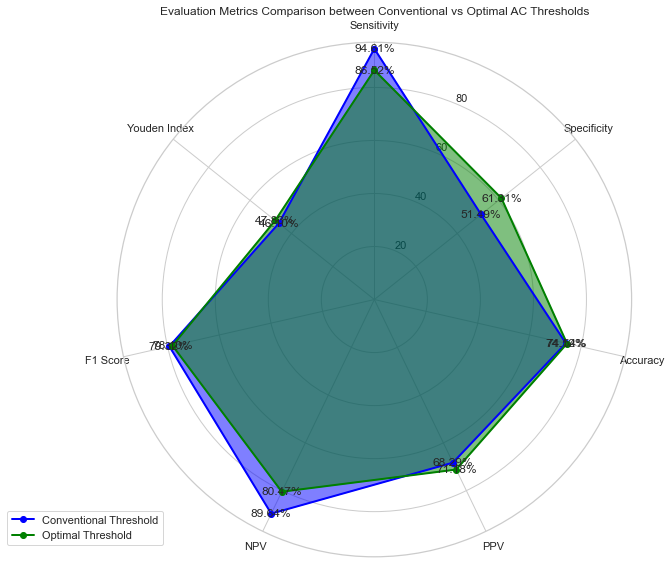

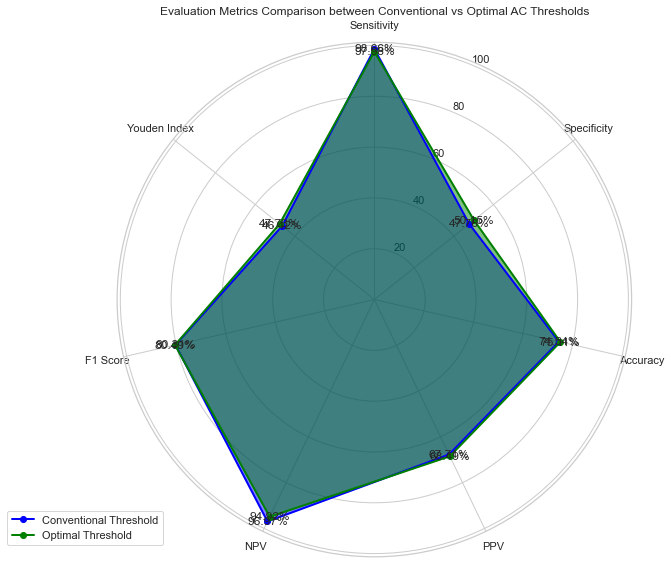

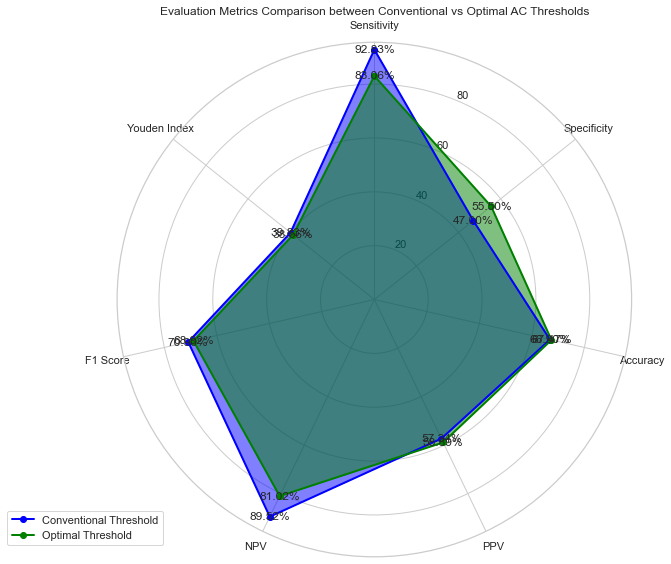

In [49]:
# For AC 
eval_metrics = compute_evaluation_metrics_ac(testing_count_brond_ndh, testing_count_brond_dh,
                                testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                conventional_threshold_unilateral, opt_threshold_ndh, opt_threshold_dh)
plot_multiple_radar_plot(eval_metrics, metric = 'AC')

In [50]:
# Using the mean values and not the values givenb by the 
group_optimal_fs_ndh = 51.33
group_optimal_fs_dh = 58.33

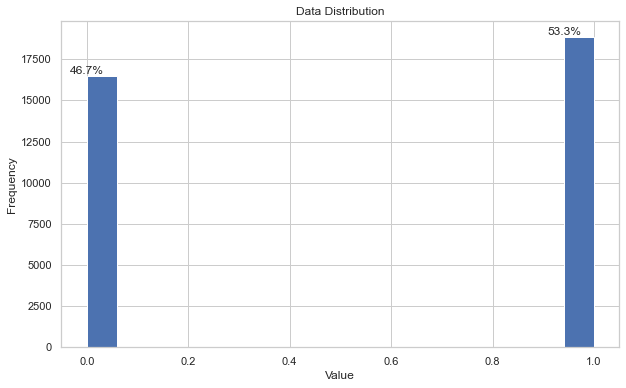

{'mean': 0.533476589007012,
 'median': 1.0,
 'iqr': 1.0,
 'range': 1,
 'std': 0.4988780592373808,
 'max': 1,
 'min': 0,
 'num_elements': 35368}

In [51]:
get_statistics(testing_GT_mask_50Hz_ndh)

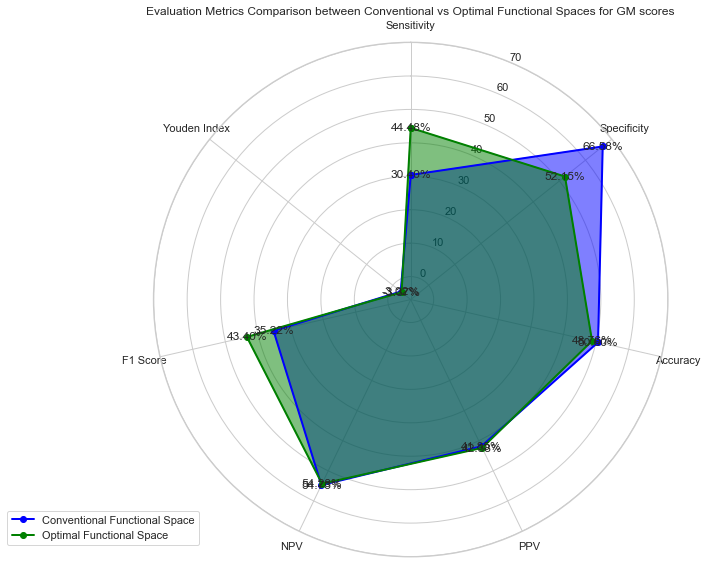

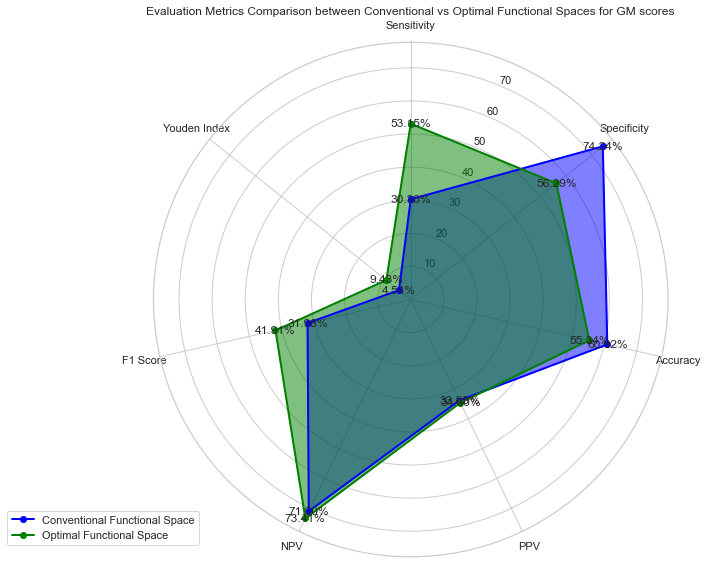

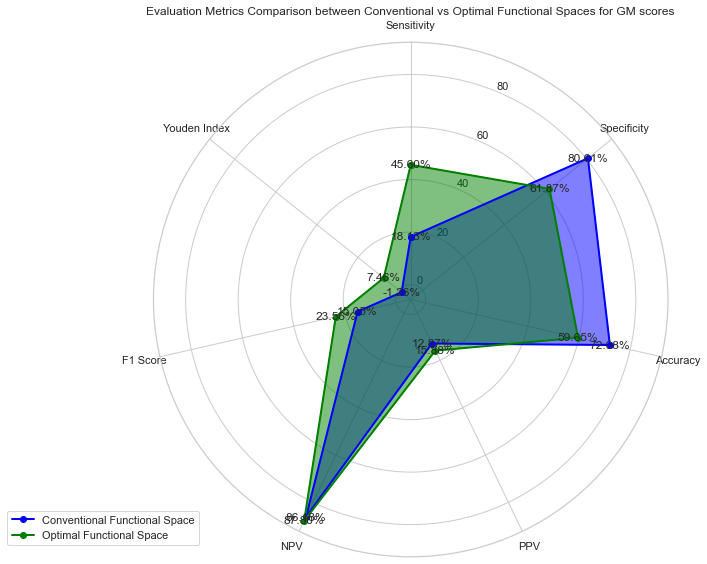

In [52]:
#For GM 
eval_metrics_gm = compute_evaluation_metrics_gm(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                  testing_yaw_mad_ndh, testing_yaw_mad_dh,
                                  testing_GT_mask_50Hz_ndh, testing_GT_mask_50Hz_dh, testing_GT_mask_bil_50Hz,
                                conventional_functional_space, group_optimal_fs_ndh, group_optimal_fs_dh)

plot_multiple_radar_plot(eval_metrics_gm, metric = 'GM')

In [53]:
# GMAC #

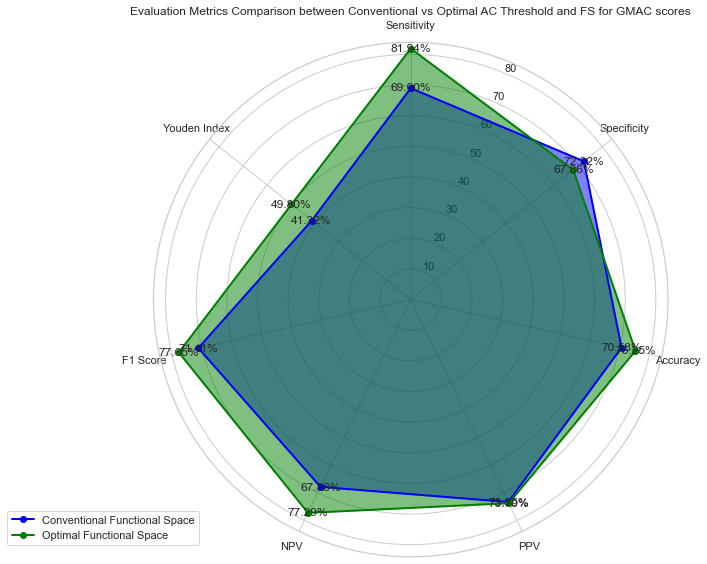

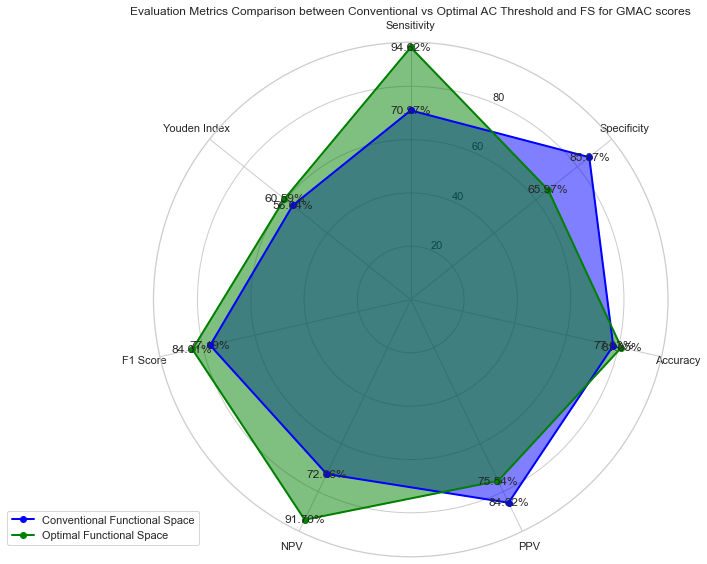

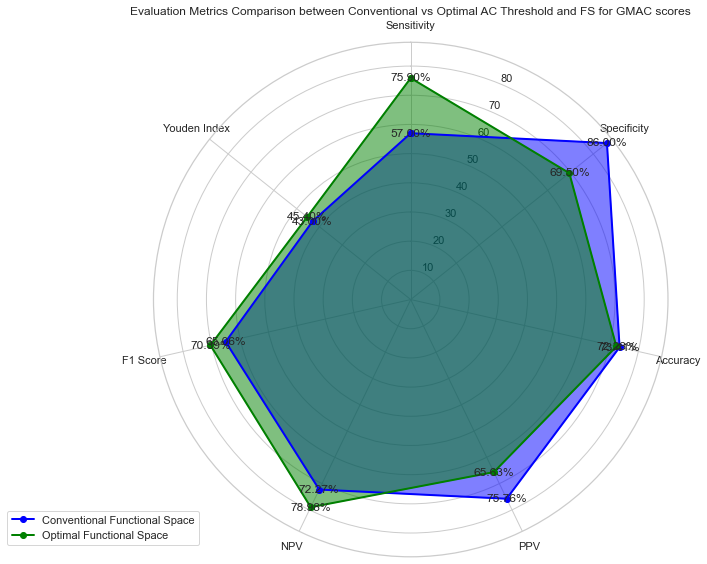

In [54]:
#For GMAC
eval_metrics_gmac = compute_evaluation_metrics_gmac(testing_pitch_mad_ndh, testing_pitch_mad_dh,
                                    testing_count_brond_ndh, testing_count_brond_dh,
                                    testing_GT_mask_ndh_1Hz, testing_GT_mask_dh_1Hz, testing_GT_mask_bil_1Hz,
                                    opt_threshold_ndh, opt_threshold_dh, group_optimal_fs_ndh, group_optimal_fs_dh)

plot_multiple_radar_plot(eval_metrics_gmac, metric = 'GMAC')